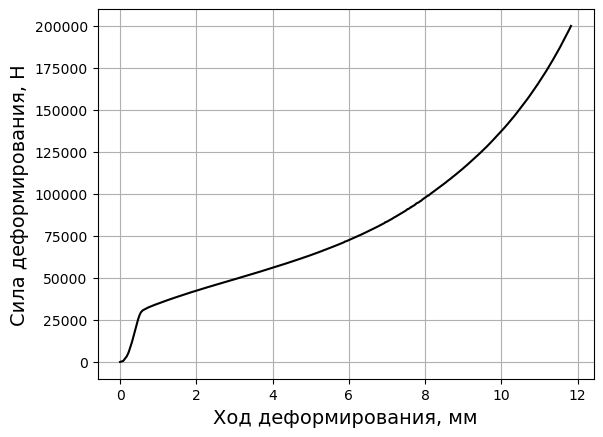

In [10]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
# импортируем библиотеку для базовых математических расчетов
import math
# Размеры образца, которые нам понадобятся позднее
b0 = 9.2 # ширина образца по ISO 6892-1:2019
L0 = 15 # начальная длина образца по ISO 6892-1:2019
a0 = 1.5 # тольщина образца по исходным данным

stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('3_20.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[1]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[2]))               # второе число в список load
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

#print(stroke[0])
#print(load[0])
#создаем "базу" для графика
plt.plot (stroke, load, '-', color = 'black')
#Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

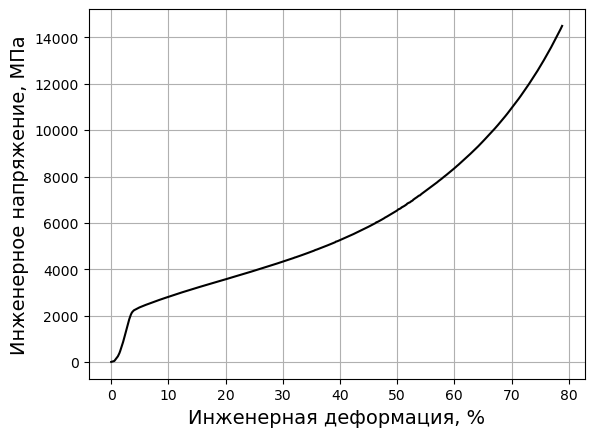

In [112]:
# Расчет инженерного напряжения
A0 = b0*a0 # расчет площади поперечного сечения образца

sigma_eng = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load)):
    sigma_eng.append(load[i]/A0)
# Расчет инженерной деформации
epsilon_eng = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke)):
    epsilon_eng.append((stroke[i]/L0)*100)
# Визуализируем результаты
# создаем "базу" для графика
plt.plot (epsilon_eng, sigma_eng, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Инженерная деформация, %', fontsize = 14)
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

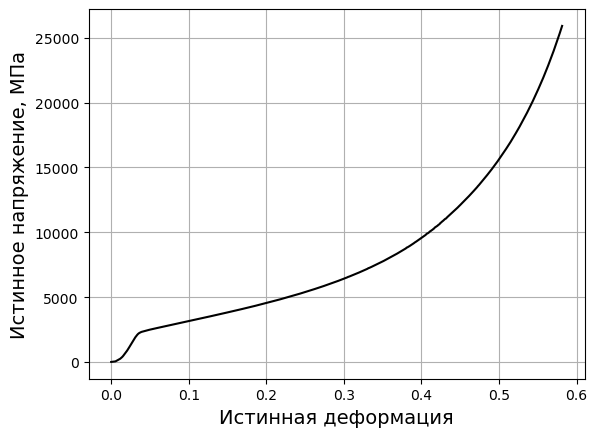

In [113]:
# Расчет истинного напряжения и деформации
sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng)):
    sigma_true.append(sigma_eng[i]*(1+epsilon_eng[i]/100))
    epsilon_true.append(math.log(1+epsilon_eng[i]/100))
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true, sigma_true, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

In [114]:
# Поиск предла прочности (максимального значения инженерного напряжения)
Rm = 0 # начальное значение переменной, которая будет хранить предел прочности
for i in range (1, len(sigma_eng)):
    if sigma_eng[i] > Rm:
        Rm = sigma_eng[i]
        i_m = i # номер строки в массиве данных, которому соответсвует предел прочности (эта переменная нам понадобится позже)
print (f'Предел прочности Rm = {round(Rm, 3)} МПа, при i = {i_m}')

Предел прочности Rm = 14490.942 МПа, при i = 548


In [103]:
# Расчет равномерного удлинния
E = 250000
Ag = epsilon_eng[i_m] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 73.048%


In [104]:
print(Rm)

14490.942028985508


In [105]:
# Сохранение данных истинное напряжение - истинная деформация в текстовый файл
# Имя и путь к файлу
filename = "3_20_res.txt"

# Записываем в файл, используя индексы
with open(filename, 'w') as f:              # открываем файл для записи
    for i in range(len(epsilon_true)):      # запускаем цикл от 0 до длины списка epsilon_true 
        eps = epsilon_true[i]               
        sig = sigma_true[i]                 
        f.write(f"{eps}\t{sig}\n")          # построчно записываем значения переменых epsilon_true[i] и sigma_true[i] в файл
                                            # здесь '\t' означает знак табуляции, '\n' - знак перехода на новую строку

<Figure size 800x600 with 0 Axes>

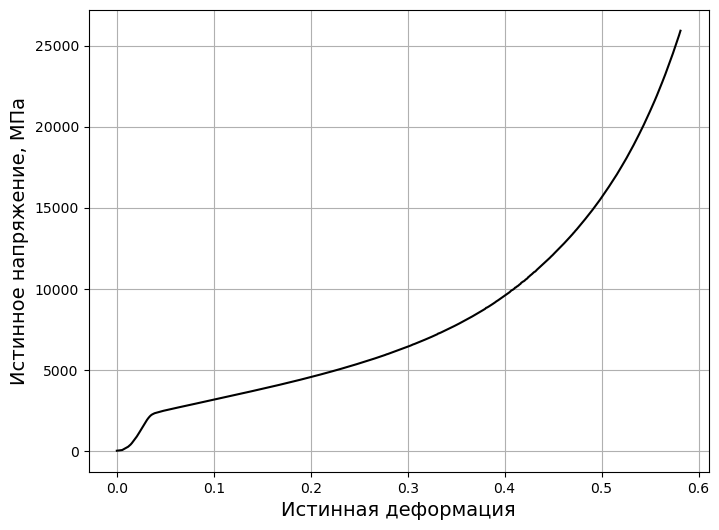

In [106]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
strain = [] # пустой список для записи данных о деформации
stress = [] # пустой список для записи данных о силе

# открываем файл с данными и считываем их в списки strain и stress
with open ('3_20_res.txt', 'r') as file: 
    for line in file:                                    
        stress_strain = line.split('\t')                  
        strain.append(float(stress_strain[0]))           
        stress.append(float(stress_strain[1])) 

# визуализируем результат
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6)) # размер графика в дюймах
plt.plot (strain, stress, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

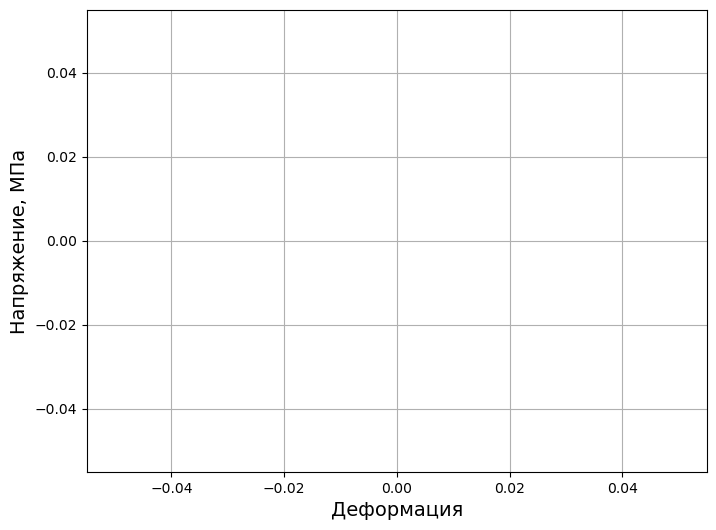

In [107]:
# посмотрим поближе на упруго-пластическую часть графика. 
elastic_limit = 0.002 # условно примем, что упругая зона расположена слева от точки 0.002 (0.2%) по оси деформации
strain_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические деформации
stress_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические напряжения

for i in range(1, len(strain)):
    if strain[i] >= elastic_limit:
        strain_elastic_plastic.append(strain[i])
        stress_elastic_plastic.append(stress[i])
    else: break

# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic, stress_elastic_plastic, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

In [108]:
numerator = 0.0 # сюда будем накапливать сумму в числителе
denominator = 0.0 # сюда в знаминателе
i=0
print(strain[0])
while strain[i] <= 0.0005:
    sigma = stress[i]
    epsilon = strain[i]
    numerator += sigma * epsilon
    denominator += epsilon * epsilon
    i+=1

if denominator != 0:
    E = numerator / denominator
else:
    E = 0
print (f'Модуль Юнга = {E}, МПа')

0.0
Модуль Юнга = 0, МПа
